## Basic Housing Model

This is a basic housing model based on features that the average person in Ames Iowa should be able to find about their house.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics

### Data
We're using data from the Ames Iowa data set from the Ames, Iowa Assessor's Office. <br>
data dictionary: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = 'train.csv' 

In [3]:
houses = pd.read_csv('./datasets/' + data)

In [18]:
# Making the column names more manageable
houses.columns = [x.lower() for x in houses.columns]
houses.columns = [x.replace(' ', '_') for x in houses.columns]

### Handling Nulls
The nulls in this dataset were all from values that should be zero.

In [19]:
houses = houses.fillna(0)

In [20]:
houses = houses[houses.lot_area <= 30000] # brings us back to lower or middle class houses

In [21]:
houses.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2026.000000,2.026000e+03,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,...,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.00000,2026.000000,2026.000000,2026.000000
mean,1470.192498,7.128568e+08,57.105133,57.786278,9538.936328,6.111056,5.566634,1971.732971,1984.229516,96.935834,...,92.386476,46.884008,22.571570,2.623396,16.384501,1.913623,43.57305,6.220138,2007.780849,180622.819842
std,843.283591,1.886325e+08,42.655071,32.122916,3732.281304,1.416658,1.104761,30.283488,21.024340,170.310017,...,126.090903,65.292352,59.882973,25.383222,57.075378,34.323615,436.80052,2.741165,1.311807,78264.064146
min,3.000000,5.263020e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,2006.000000,12789.000000
25%,751.250000,5.284582e+08,20.000000,44.000000,7500.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4.000000,2007.000000,129500.000000
50%,1472.500000,5.354531e+08,50.000000,63.000000,9360.000000,6.000000,5.000000,1975.000000,1993.000000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.00000,6.000000,2008.000000,161750.000000
75%,2192.250000,9.071751e+08,70.000000,78.000000,11417.750000,7.000000,6.000000,2001.000000,2004.000000,158.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.00000,8.000000,2009.000000,213000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,27650.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,12500.00000,12.000000,2010.000000,611657.000000


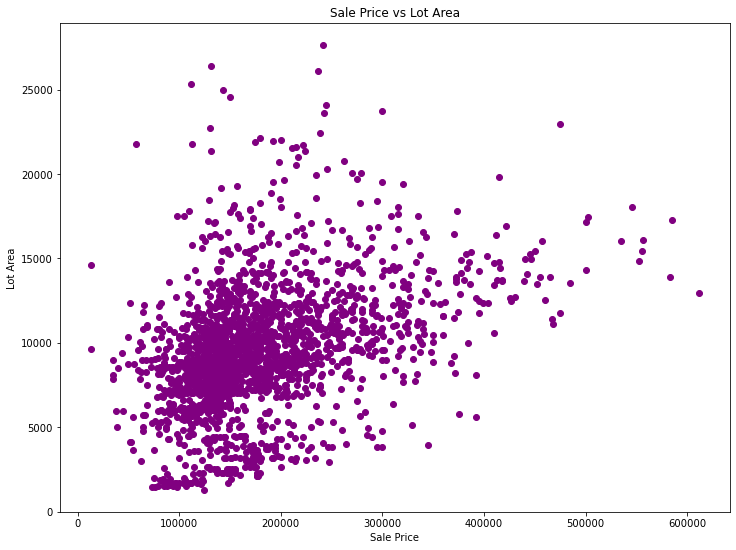

In [22]:
plt.figure(figsize = [12, 9])
plt.scatter(houses['saleprice'], houses['lot_area'], c = 'purple')
plt.title('Sale Price vs Lot Area')
plt.ylabel('Lot Area')
plt.xlabel('Sale Price');

In [23]:
houses.drop_duplicates()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,0,IR1,HLS,...,0,0,0,0,0,0,1,2008,WD,298751
2047,785,905377130,30,RL,0.0,12342,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,0,Reg,Bnk,...,0,0,0,0,0,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,11,2009,WD,144000


### Data Selection
I chose data that most people would be able to find out about their own house with some minor amount of research <br>
Aside from that. I removed the pieces that were seemingly co-linear based on which of the co-linear pieces<br>
would have been harder for someone to find on their own, e.g. garage_cars vs garage_area.


In [24]:
x = ['ms_zoning', 'lot_area', 'street', 'alley', 'utilities', 'lot_config',
     'bldg_type', 'house_style', 'year_built', 'year_remod/add', 'roof_style', 'bsmt_qual',
     'total_bsmt_sf', 'heating', 'central_air', '1st_flr_sf', '2nd_flr_sf', 'full_bath',
     'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_type', 'garage_cars', 
     'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 
     'fence', 'saleprice']
houses = houses[x]

In [25]:
houses = houses[houses['saleprice'] < 500000] # keeps us at lower or middle class houses

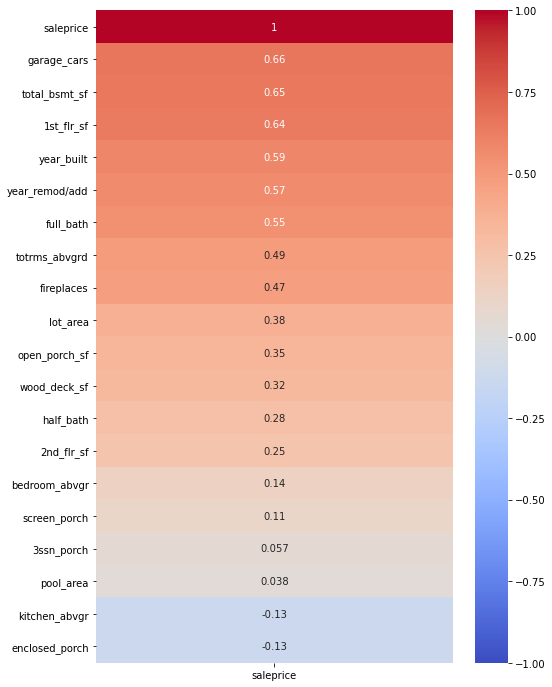

In [26]:
plt.figure(figsize = [8, 12])
sns.heatmap(houses.corr()[['saleprice']].sort_values(by='saleprice', ascending = False), 
            vmin = -1, 
            vmax = 1, 
            annot = True, 
            cmap = 'coolwarm'); # checking if theres any co-linear data still

In [37]:
objects = [x for x in houses.columns if houses[x].dtype == object]
not_objects = [x for x in houses.drop(columns = 'saleprice').columns if houses[x].dtype != object] 
houses = pd.get_dummies(houses, drop_first = True, columns = objects)# getting dummies of all dtype object columns

In [38]:
houses.to_csv('./datasets/cleanedtrain.csv')